In [15]:
# Import datasets & libraries
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

# 1. Exploring the CIFAR-100 Dataset

In [14]:
# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


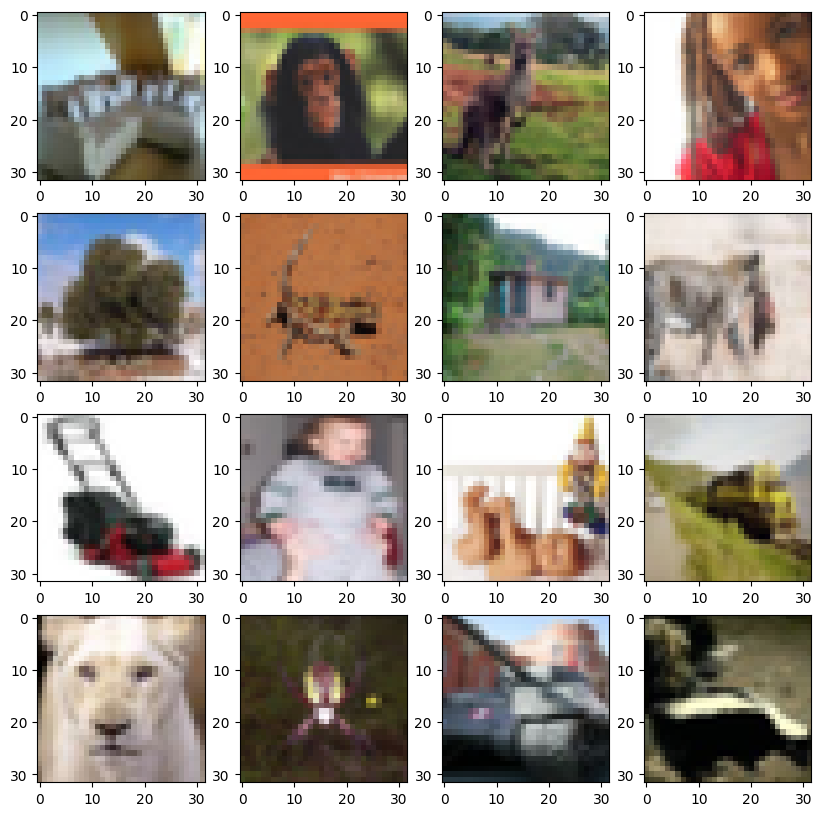

In [16]:
# Show randomly 16 images in the CIFAR-100
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])

# 2. Preprocessing for CIFAR-100 dataset

In [17]:
# Import libraries for preprocessing images
from tensorflow.keras.utils import to_categorical

# Normalize images
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

# Transform labels to one hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# 3. Build CNN models for classification task

In [18]:
# Import Libraries for CNN
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout

In [19]:
# Plot function for visualisation training process
import matplotlib.pyplot as plt

def training_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

## 3.1 A simple CNN model with RMSprop optimizer and Adam optimizer

In [23]:
# Model
# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Add a classifier on top of CNN

#레이어 두개 추가 3개에서 5개로
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Conv2D(64, (3,3), activation='relu'))
# 생략 너무 크기가 작아져서 오류 발생model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

ValueError: Computed output size would be negative. Received `inputs shape=(None, 0, 0, 64)`, `kernel shape=(3, 3, 64, 64)`, `dilation_rate=[1 1]`.

In [21]:
# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [13]:
# Training and testing model
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=200,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

ValueError: You must call `compile()` before using the model.

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

In [ ]:
# Using Adam optimizer

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=400,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

## 3.2 Increased filters in CNN and increased conv layers in CNN

In [ ]:
# Build CNN model with increase of filters
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=400,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

In [ ]:
# Build CNN model with increase of convolution layers
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))


# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=400,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=400,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

## 3.3 Simple model with data augmentation and simple model added dropout layers with data augmentation

In [ ]:
# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=400,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

In [ ]:
# CNN increased layers and nodes + Dropout with data augmentation
model = Sequential()
# Stack 1
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Stack 2
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=400,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

## 3.4 Batch norm model 1

In [ ]:
#Model with Batch norm type 1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
# Stack 1
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Stack 2
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=700,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

## 3.5 Batch norm model 2

In [ ]:
# import BatchNormalization
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()

model.add(Conv2D(128,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(100,activation='softmax'))
model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=700,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

## 3.6 Batch Norm model 3

In [ ]:
# Batch norm model 3
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()

model.add(Conv2D(128,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=350,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

##3.7 Batch norm model 4 - The best model

In [ ]:
# Batch norm model 4
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()

model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=350,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

In [ ]:
from google.colab import drive

ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

In [ ]:
%cd drive/MyDrive/results/

In [ ]:
!pwd
model.save('66%_accuracy_on_test.h5')

In [ ]:
from keras.models import load_model
model = load_model('66%_accuracy_on_test.h5')

In [ ]:
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

In [ ]:
# Translate categorial to array for drawing confusion matrix
from sklearn.metrics import confusion_matrix
from numpy import argmax
prediction = []
true_labels = []

pred = model.predict(test_images)
print(test_labels.shape[0])
for i in range(test_labels.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(test_labels[i]))

cm = confusion_matrix(prediction, true_labels)

In [ ]:
# Name of all classes in CIFAR-100
classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
'aquarium' ,'fish', 'ray', 'shark', 'trout',
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
'bottles', 'bowls', 'cans', 'cups', 'plates',
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe',
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
'bear', 'leopard', 'lion', 'tiger', 'wolf',
'bridge', 'castle', 'house', 'road', 'skyscraper',
'cloud', 'forest', 'mountain', 'plain', 'sea',
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
'crab', 'lobster', 'snail', 'spider', 'worm',
'baby', 'boy', 'girl', 'man', 'woman',
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
'maple', 'oak', 'palm', 'pine', 'willow',
'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

In [ ]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
print(cm)
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + classes)
ax.set_yticklabels([''] + classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Calculating f1 score
from sklearn.metrics import f1_score
print(f"f1 score: {f1_score(true_labels, prediction, average='weighted')}")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, prediction, target_names=classes, digits=5))